In [1]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 기본 images 폴더를 기준으로 data 생성
path_list = glob.glob('/opt/ml/input/data/train/images/*/*')

In [3]:
df = pd.DataFrame(path_list, columns=['path'])

In [4]:
df.head()

,path
0,/opt/ml/input/data/train/images/001270_male_As...
1,/opt/ml/input/data/train/images/001270_male_As...
2,/opt/ml/input/data/train/images/001270_male_As...
3,/opt/ml/input/data/train/images/001270_male_As...
4,/opt/ml/input/data/train/images/001270_male_As...


In [5]:
sample_path = df.iloc[0].path
sample_path

'/opt/ml/input/data/train/images/001270_male_Asian_21/incorrect_mask.jpg'

In [6]:
sample_path.split('/')[-2]

'001270_male_Asian_21'

In [7]:
sample_path.split('/')[-2].split('_')[-1]

'21'

In [8]:
df['age'] = df['path'].apply(lambda x: int(x.split('/')[-2].split('_')[-1]))

In [9]:
df.head()

,path,age
0,/opt/ml/input/data/train/images/001270_male_As...,21
1,/opt/ml/input/data/train/images/001270_male_As...,21
2,/opt/ml/input/data/train/images/001270_male_As...,21
3,/opt/ml/input/data/train/images/001270_male_As...,21
4,/opt/ml/input/data/train/images/001270_male_As...,21


In [10]:
sample_path.split('/')[-2].split('_')[1]

'male'

In [11]:
df['gender'] = df['path'].apply(lambda x: x.split('/')[-2].split('_')[1])

In [12]:
df.head()

,path,age,gender
0,/opt/ml/input/data/train/images/001270_male_As...,21,male
1,/opt/ml/input/data/train/images/001270_male_As...,21,male
2,/opt/ml/input/data/train/images/001270_male_As...,21,male
3,/opt/ml/input/data/train/images/001270_male_As...,21,male
4,/opt/ml/input/data/train/images/001270_male_As...,21,male


In [13]:
sample_path.split('/')[-1]

'incorrect_mask.jpg'

In [14]:
sample_path.split('/')[-1].split('.')[0]

'incorrect_mask'

In [15]:
df['origin_mask'] = df['path'].apply(lambda x: x.split('/')[-1].split('.')[0])

In [16]:
df.head()

,path,age,gender,origin_mask
0,/opt/ml/input/data/train/images/001270_male_As...,21,male,incorrect_mask
1,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask2
2,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask3
3,/opt/ml/input/data/train/images/001270_male_As...,21,male,normal
4,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask5


In [17]:
df['mask_cd'] = df['origin_mask'].apply(lambda x: 1 if 'incorrect' in x else 2 if 'normal' in x else 0)

In [18]:
df.head()

,path,age,gender,origin_mask,mask_cd
0,/opt/ml/input/data/train/images/001270_male_As...,21,male,incorrect_mask,1
1,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask2,0
2,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask3,0
3,/opt/ml/input/data/train/images/001270_male_As...,21,male,normal,2
4,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask5,0


In [19]:
df['gender_cd'] = df['gender'].apply(lambda x: 0 if x == 'male' else 1)

In [20]:
df.head()

,path,age,gender,origin_mask,mask_cd,gender_cd
0,/opt/ml/input/data/train/images/001270_male_As...,21,male,incorrect_mask,1,0
1,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask2,0,0
2,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask3,0,0
3,/opt/ml/input/data/train/images/001270_male_As...,21,male,normal,2,0
4,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask5,0,0


In [21]:
df['age_cd'] = df['age'].apply(lambda x: 0 if x < 30 else 1 if x < 58 else 2)

In [22]:
df.head()

,path,age,gender,origin_mask,mask_cd,gender_cd,age_cd
0,/opt/ml/input/data/train/images/001270_male_As...,21,male,incorrect_mask,1,0,0
1,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask2,0,0,0
2,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask3,0,0,0
3,/opt/ml/input/data/train/images/001270_male_As...,21,male,normal,2,0,0
4,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask5,0,0,0


In [23]:
sample_path.split('/')[-2]

'001270_male_Asian_21'

In [24]:
sample_path.split('/')[-2].split('_')[0]

'001270'

In [25]:
df['id'] = df['path'].apply(lambda x: x.split('/')[-2].split('_')[0])

In [26]:
df.head()

,path,age,gender,origin_mask,mask_cd,gender_cd,age_cd,id
0,/opt/ml/input/data/train/images/001270_male_As...,21,male,incorrect_mask,1,0,0,001270
1,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask2,0,0,0,001270
2,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask3,0,0,0,001270
3,/opt/ml/input/data/train/images/001270_male_As...,21,male,normal,2,0,0,001270
4,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask5,0,0,0,001270


In [27]:
type(df.id[0])

str

1. Correcting Gender Labeling Error (Female Part)

!>[image.png](attachment:f2013f3f-4a37-40e0-97d1-b926818b243a.png)
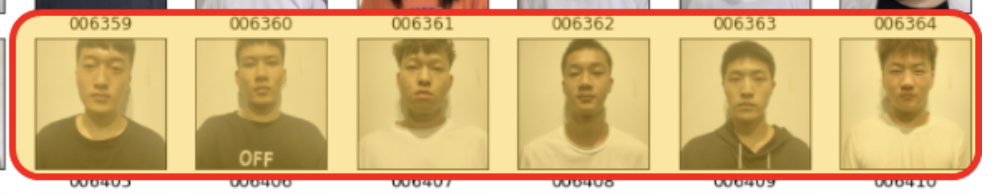

In [28]:
df['modified_gender'] = df['gender']

In [29]:
# correct labels female -> male
female_male = ['006359', '006360', '006361', '006362', '006363', '006364']
df.loc[df['id'].isin(female_male),'gender_cd'] = 0
df.loc[df['id'].isin(female_male),'modified_gender'] = 'male'
df.loc[df['id'].isin(female_male)]

,path,age,gender,origin_mask,mask_cd,gender_cd,age_cd,id,modified_gender
3150,/opt/ml/input/data/train/images/006360_female_...,18,female,incorrect_mask,1,0,0,006360,male
3151,/opt/ml/input/data/train/images/006360_female_...,18,female,mask2,0,0,0,006360,male
3152,/opt/ml/input/data/train/images/006360_female_...,18,female,mask3,0,0,0,006360,male
3153,/opt/ml/input/data/train/images/006360_female_...,18,female,normal,2,0,0,006360,male
3154,/opt/ml/input/data/train/images/006360_female_...,18,female,mask5,0,0,0,006360,male
3155,/opt/ml/input/data/train/images/006360_female_...,18,female,mask4,0,0,0,006360,male
3156,/opt/ml/input/data/train/images/006360_female_...,18,female,mask1,0,0,0,006360,male
4893,/opt/ml/input/data/train/images/006363_female_...,18,female,incorrect_mask,1,0,0,006363,male
4894,/opt/ml/input/data/train/images/006363_female_...,18,female,mask2,0,0,0,006363,male
4895,/opt/ml/input/data/train/images/006363_female_...,18,female,mask3,0,0,0,006363,male


!>[image.png](attachment:5a07c5ca-e532-42c3-9320-664c8917ba2e.png)
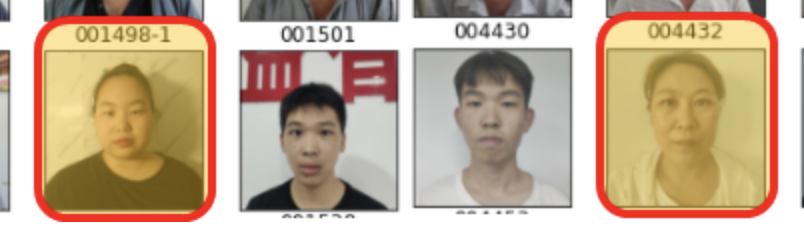

In [30]:
# correct labels male -> female
male_female = ['001498-1', '004432']
df.loc[df['id'].isin(male_female),'gender_cd'] = 1
df.loc[df['id'].isin(male_female),'modified_gender'] = 'female'
df.loc[df['id'].isin(male_female)]

,path,age,gender,origin_mask,mask_cd,gender_cd,age_cd,id,modified_gender
11536,/opt/ml/input/data/train/images/001498-1_male_...,23,male,incorrect_mask,1,1,0,001498-1,female
11537,/opt/ml/input/data/train/images/001498-1_male_...,23,male,mask2,0,1,0,001498-1,female
11538,/opt/ml/input/data/train/images/001498-1_male_...,23,male,mask3,0,1,0,001498-1,female
11539,/opt/ml/input/data/train/images/001498-1_male_...,23,male,normal,2,1,0,001498-1,female
11540,/opt/ml/input/data/train/images/001498-1_male_...,23,male,mask5,0,1,0,001498-1,female
11541,/opt/ml/input/data/train/images/001498-1_male_...,23,male,mask4,0,1,0,001498-1,female
11542,/opt/ml/input/data/train/images/001498-1_male_...,23,male,mask1,0,1,0,001498-1,female
16632,/opt/ml/input/data/train/images/004432_male_As...,43,male,incorrect_mask,1,1,1,004432,female
16633,/opt/ml/input/data/train/images/004432_male_As...,43,male,mask2,0,1,1,004432,female
16634,/opt/ml/input/data/train/images/004432_male_As...,43,male,mask3,0,1,1,004432,female


2. Mask Labeling Error

!>[image.png](attachment:91ad96a0-7247-409c-b2c6-f0f3589dbcda.png)
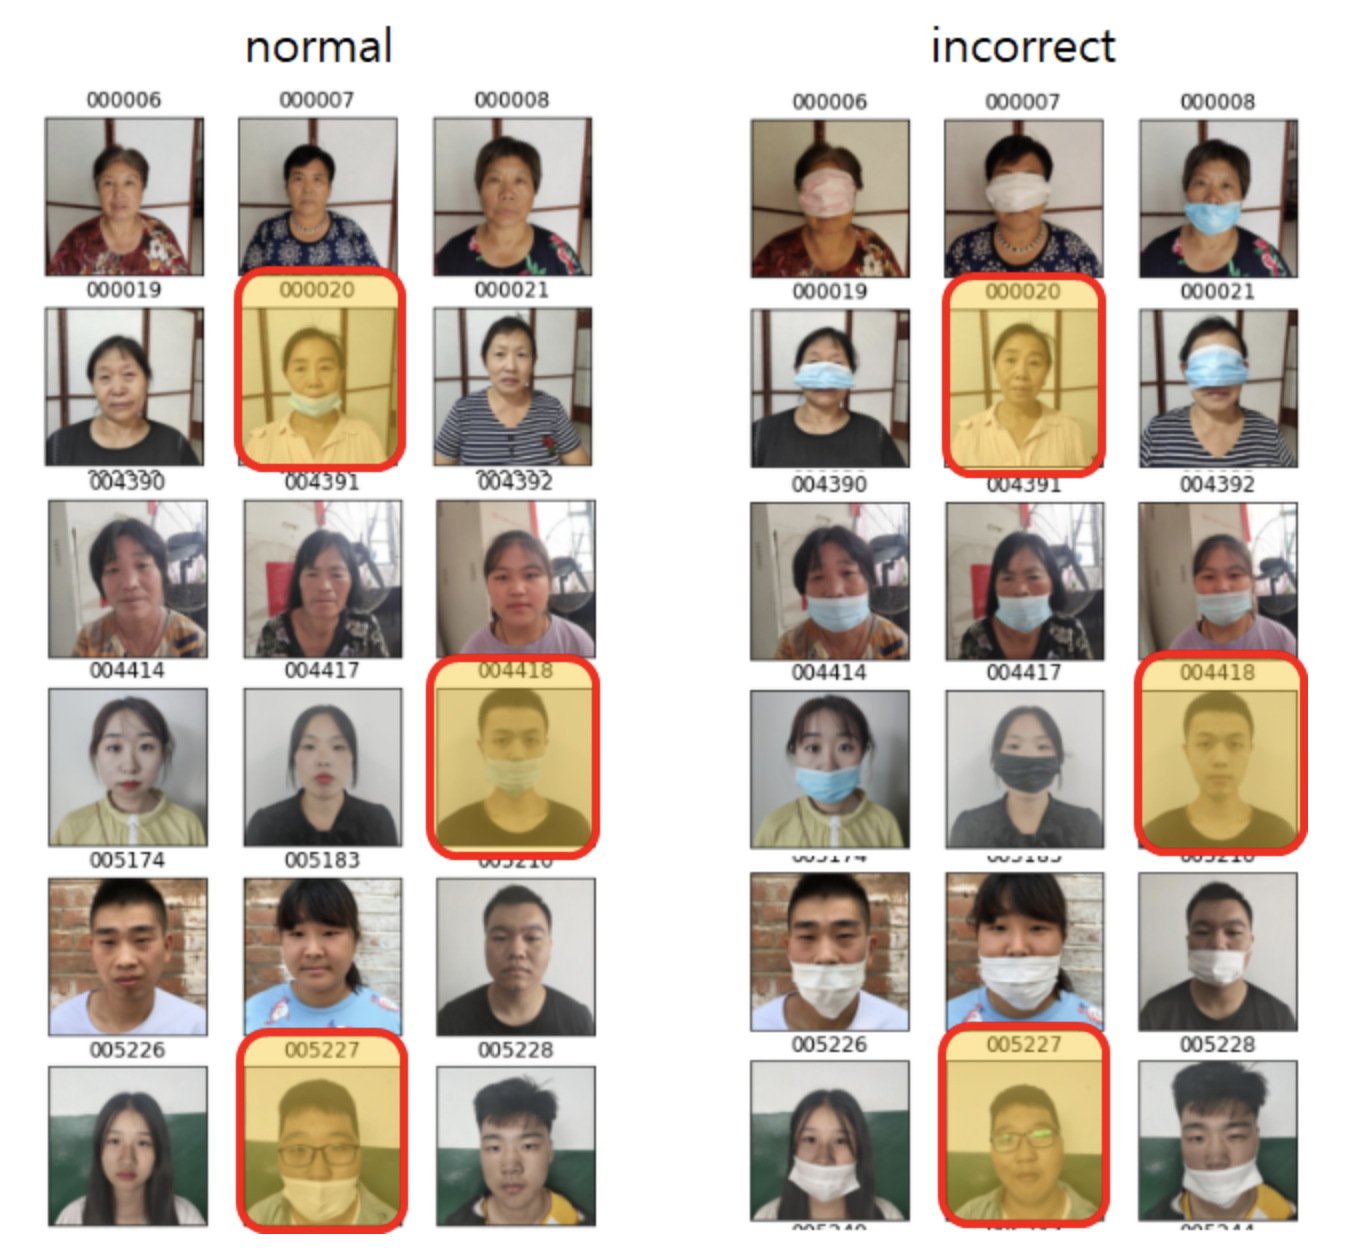

In [31]:
mask_wrong = ['000020', '004418', '005227']

In [32]:
# mask 여부 나누기 위해 확인하는 코드
df['path'][0]

'/opt/ml/input/data/train/images/001270_male_Asian_21/incorrect_mask.jpg'

In [33]:
df.loc[df['id'].isin(mask_wrong)]

,path,age,gender,origin_mask,mask_cd,gender_cd,age_cd,id,modified_gender
9338,/opt/ml/input/data/train/images/004418_male_As...,20,male,incorrect_mask,1,0,0,004418,male
9339,/opt/ml/input/data/train/images/004418_male_As...,20,male,mask2,0,0,0,004418,male
9340,/opt/ml/input/data/train/images/004418_male_As...,20,male,mask3,0,0,0,004418,male
9341,/opt/ml/input/data/train/images/004418_male_As...,20,male,normal,2,0,0,004418,male
9342,/opt/ml/input/data/train/images/004418_male_As...,20,male,mask5,0,0,0,004418,male
9343,/opt/ml/input/data/train/images/004418_male_As...,20,male,mask4,0,0,0,004418,male
9344,/opt/ml/input/data/train/images/004418_male_As...,20,male,mask1,0,0,0,004418,male
12964,/opt/ml/input/data/train/images/000020_female_...,50,female,incorrect_mask,1,1,1,000020,female
12965,/opt/ml/input/data/train/images/000020_female_...,50,female,mask2,0,1,1,000020,female
12966,/opt/ml/input/data/train/images/000020_female_...,50,female,mask3,0,1,1,000020,female


In [34]:
state = ['incorrect_mask', 'normal']
check_mask = df.loc[df['id'].isin(mask_wrong) & df['origin_mask'].isin(state), ['path', 'origin_mask']]
display(check_mask.head())
len(check_mask)

,path,origin_mask
9338,/opt/ml/input/data/train/images/004418_male_As...,incorrect_mask
9341,/opt/ml/input/data/train/images/004418_male_As...,normal
12964,/opt/ml/input/data/train/images/000020_female_...,incorrect_mask
12967,/opt/ml/input/data/train/images/000020_female_...,normal
13496,/opt/ml/input/data/train/images/005227_male_As...,incorrect_mask


6

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

mask, label = check_mask['path'].tolist(), check_mask['origin_mask'].tolist()

fig, axes = plt.subplots(1, 6, figsize=(20,20), dpi=150)
for i in range(6):
    im = Image.open(mask[i])
    axes[i].imshow(im)
    axes[i].set_title(label[i])
plt.show()

In [36]:
df.loc[(df['id'].isin(mask_wrong))&(df['origin_mask']=='incorrect_mask') ,'mask_cd'] = 2
df.loc[(df['id'].isin(mask_wrong))&(df['origin_mask']=='normal') ,'mask_cd'] = 1
# pandas 버전따라 다른지 모르겠으나 loc 함수 내에 다중 조건이 붙을 때
# df.loc[(condition1)&(condition2), column] = value
# 형태로 적어줘야 반영됨

In [37]:
df['modified_mask'] = df['origin_mask']

In [38]:
df.head()

,path,age,gender,origin_mask,mask_cd,gender_cd,age_cd,id,modified_gender,modified_mask
0,/opt/ml/input/data/train/images/001270_male_As...,21,male,incorrect_mask,1,0,0,001270,male,incorrect_mask
1,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask2,0,0,0,001270,male,mask2
2,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask3,0,0,0,001270,male,mask3
3,/opt/ml/input/data/train/images/001270_male_As...,21,male,normal,2,0,0,001270,male,normal
4,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask5,0,0,0,001270,male,mask5


In [39]:
df.loc[(df['id'].isin(mask_wrong))&(df['origin_mask']=='incorrect_mask'), 'modified_mask'] = 'normal'
df.loc[(df['id'].isin(mask_wrong))&(df['origin_mask']=='normal'), 'modified_mask'] = 'incorrect_mask'

In [40]:
df.loc[df['id'].isin(mask_wrong)]

,path,age,gender,origin_mask,mask_cd,gender_cd,age_cd,id,modified_gender,modified_mask
9338,/opt/ml/input/data/train/images/004418_male_As...,20,male,incorrect_mask,2,0,0,004418,male,normal
9339,/opt/ml/input/data/train/images/004418_male_As...,20,male,mask2,0,0,0,004418,male,mask2
9340,/opt/ml/input/data/train/images/004418_male_As...,20,male,mask3,0,0,0,004418,male,mask3
9341,/opt/ml/input/data/train/images/004418_male_As...,20,male,normal,1,0,0,004418,male,incorrect_mask
9342,/opt/ml/input/data/train/images/004418_male_As...,20,male,mask5,0,0,0,004418,male,mask5
9343,/opt/ml/input/data/train/images/004418_male_As...,20,male,mask4,0,0,0,004418,male,mask4
9344,/opt/ml/input/data/train/images/004418_male_As...,20,male,mask1,0,0,0,004418,male,mask1
12964,/opt/ml/input/data/train/images/000020_female_...,50,female,incorrect_mask,2,1,1,000020,female,normal
12965,/opt/ml/input/data/train/images/000020_female_...,50,female,mask2,0,1,1,000020,female,mask2
12966,/opt/ml/input/data/train/images/000020_female_...,50,female,mask3,0,1,1,000020,female,mask3


3. Mask, Age, Gender에 맞게 class 다시 수정하기

In [41]:
df['modified_target'] = df['mask_cd'] * 6 + df['gender_cd'] * 3 + df['age_cd']

4. 확인

In [42]:
check_id = female_male + male_female + mask_wrong
check_id

['006359',
 '006360',
 '006361',
 '006362',
 '006363',
 '006364',
 '001498-1',
 '004432',
 '000020',
 '004418',
 '005227']

In [43]:
check_id_df = df.loc[df['id'].isin(check_id)].sort_values(['id', 'modified_mask'])
len(check_id_df)

77

In [ ]:
fig, axes = plt.subplots(11, 7, figsize=(15, 20))
axes = axes.flatten()

for i, (_, row) in enumerate(check_id_df.iterrows()):
    img = Image.open(row['path'])
    axes[i].imshow(img)
    axes[i].set_title(f"{row['age']}/{row['modified_gender']}/{row['modified_mask']}")
    
for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

5. 바뀐 df perfect_train.csv로 저장

In [47]:
df.head()

,path,age,gender,origin_mask,mask_cd,gender_cd,age_cd,id,modified_gender,modified_mask,modified_target
0,/opt/ml/input/data/train/images/001270_male_As...,21,male,incorrect_mask,1,0,0,001270,male,incorrect_mask,6
1,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask2,0,0,0,001270,male,mask2,0
2,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask3,0,0,0,001270,male,mask3,0
3,/opt/ml/input/data/train/images/001270_male_As...,21,male,normal,2,0,0,001270,male,normal,12
4,/opt/ml/input/data/train/images/001270_male_As...,21,male,mask5,0,0,0,001270,male,mask5,0


In [48]:
perfect_df = df[['path', 'age_cd', 'gender_cd', 'mask_cd', 'modified_target']].copy()
perfect_df.rename(columns={'age_cd': 'age', 
                           'gender_cd': 'gender', 
                           'mask_cd': 'mask', 
                           'modified_target': 'label'},
                  inplace=True)
perfect_df.head()

,path,age,gender,mask,label
0,/opt/ml/input/data/train/images/001270_male_As...,0,0,1,6
1,/opt/ml/input/data/train/images/001270_male_As...,0,0,0,0
2,/opt/ml/input/data/train/images/001270_male_As...,0,0,0,0
3,/opt/ml/input/data/train/images/001270_male_As...,0,0,2,12
4,/opt/ml/input/data/train/images/001270_male_As...,0,0,0,0


In [49]:
# 아래 경로 필요에 따라 수정
perfect_df.to_csv('/opt/ml/input/data/train/perfect_train.csv', index=False)
print('Done!')

Done!


## Stratified K-Fold 를 위한 작업

In [50]:
perfect_df['people_path'] = perfect_df['path'].apply(lambda x: x.split('/')[-2])
perfect_df.head()

,path,age,gender,mask,label,people_path
0,/opt/ml/input/data/train/images/001270_male_As...,0,0,1,6,001270_male_Asian_21
1,/opt/ml/input/data/train/images/001270_male_As...,0,0,0,0,001270_male_Asian_21
2,/opt/ml/input/data/train/images/001270_male_As...,0,0,0,0,001270_male_Asian_21
3,/opt/ml/input/data/train/images/001270_male_As...,0,0,2,12,001270_male_Asian_21
4,/opt/ml/input/data/train/images/001270_male_As...,0,0,0,0,001270_male_Asian_21


In [51]:
perfect_df['sub_label'] = perfect_df.apply(lambda x: x['gender'] * 3 + x['age'], axis=1)
perfect_df.head()

,path,age,gender,mask,label,people_path,sub_label
0,/opt/ml/input/data/train/images/001270_male_As...,0,0,1,6,001270_male_Asian_21,0
1,/opt/ml/input/data/train/images/001270_male_As...,0,0,0,0,001270_male_Asian_21,0
2,/opt/ml/input/data/train/images/001270_male_As...,0,0,0,0,001270_male_Asian_21,0
3,/opt/ml/input/data/train/images/001270_male_As...,0,0,2,12,001270_male_Asian_21,0
4,/opt/ml/input/data/train/images/001270_male_As...,0,0,0,0,001270_male_Asian_21,0


In [52]:
sub_label_df = perfect_df.drop_duplicates(subset=['people_path', 'sub_label']).reset_index(drop=True)
sub_label_df.head()

,path,age,gender,mask,label,people_path,sub_label
0,/opt/ml/input/data/train/images/001270_male_As...,0,0,1,6,001270_male_Asian_21,0
1,/opt/ml/input/data/train/images/006941_male_As...,0,0,1,6,006941_male_Asian_20,0
2,/opt/ml/input/data/train/images/004254_female_...,1,1,1,10,004254_female_Asian_53,4
3,/opt/ml/input/data/train/images/004021_male_As...,2,0,1,8,004021_male_Asian_59,2
4,/opt/ml/input/data/train/images/005549_male_As...,1,0,1,7,005549_male_Asian_34,1


In [53]:
from sklearn.model_selection import StratifiedKFold

In [55]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)
    
for n_iter, (train_idx, valid_idx) in enumerate(skf.split(sub_label_df, sub_label_df.sub_label), start=1):
    train_people_path = sub_label_df.iloc[train_idx].people_path.tolist()
    valid_people_path = sub_label_df.iloc[valid_idx].people_path.tolist()
    
    train_df = perfect_df[perfect_df['people_path'].isin(train_people_path)]
    valid_df = perfect_df[perfect_df['people_path'].isin(valid_people_path)]
    
    display(train_df)
    
    break

,path,age,gender,mask,label,people_path,sub_label
14,/opt/ml/input/data/train/images/004254_female_...,1,1,1,10,004254_female_Asian_53,4
15,/opt/ml/input/data/train/images/004254_female_...,1,1,0,4,004254_female_Asian_53,4
16,/opt/ml/input/data/train/images/004254_female_...,1,1,0,4,004254_female_Asian_53,4
17,/opt/ml/input/data/train/images/004254_female_...,1,1,2,16,004254_female_Asian_53,4
18,/opt/ml/input/data/train/images/004254_female_...,1,1,0,4,004254_female_Asian_53,4
...,...,...,...,...,...,...,...
18895,/opt/ml/input/data/train/images/006159_male_As...,0,0,1,6,006159_male_Asian_20,0
18896,/opt/ml/input/data/train/images/006159_male_As...,0,0,0,0,006159_male_Asian_20,0
18897,/opt/ml/input/data/train/images/006159_male_As...,0,0,0,0,006159_male_Asian_20,0
18898,/opt/ml/input/data/train/images/006159_male_As...,0,0,0,0,006159_male_Asian_20,0
